In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import auctiondates.auctionFileProcessing as afp

%load_ext autoreload
%autoreload 2

AUCTION_FILENAME = r"auctiondates/UST Auction All Data_20230313.csv"
auction_data = afp.loadJPMFullAuctionTable(AUCTION_FILENAME)
twos = afp.pdGetOneAuctionResults(auction_data, 2)
fives = afp.pdGetOneAuctionResults(auction_data, 5)
display(fives)

,bond_series,num_auctions,5Y Tail,5Y BC,5Y Indirect,5Y Direct,5Y Reopening,5Y SOMA,5Y DepInsts,5Y Individuals,5Y Dealers,5Y Pensions,5Y Investments,5Y Foreigns,5Y AuctionSize,5Y AuctionYield
Date,,,,,,,,,,,,,,,,
2018-03-27,[5Y],1.0,0.3,2.50,63.51186,8.29640,1.0,14.97734,0.00000,0.16327,31.36983,0.07143,53.73740,14.45522,35.0,2.612
2018-04-25,[5Y],1.0,0.0,2.49,60.16251,13.67845,1.0,11.31904,0.00000,0.17542,29.82195,0.07143,55.91280,9.54693,35.0,2.837
2018-05-23,[5Y],1.0,0.2,2.52,56.19378,10.86355,1.0,14.80026,0.13889,0.16159,36.15987,0.13889,54.04516,7.89447,36.0,2.864
2018-06-27,[5Y],1.0,0.4,2.55,62.02808,9.49568,1.0,11.07435,0.13889,0.10134,32.35578,0.00000,55.36409,12.01212,36.0,2.719
2018-07-25,[5Y],1.0,-0.9,2.61,67.21612,8.68697,1.0,5.15044,0.00000,0.09361,26.68961,0.00000,64.69931,7.87025,36.0,2.815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26,[5Y],1.0,-1.7,2.48,67.97763,15.55846,0.0,0.00000,0.00023,0.48514,18.20185,0.00000,68.13889,13.17389,43.0,4.192
2022-11-21,"[2Y, 5Y]",2.0,0.3,2.39,66.22492,18.70724,0.0,9.80554,0.00176,0.31284,16.83299,0.00000,68.10551,10.68178,43.0,3.970
2022-12-28,[5Y],1.0,0.4,2.46,64.51283,18.56467,0.0,0.00000,0.06087,0.45925,18.44228,0.00000,66.02845,14.99775,43.0,3.973


In [2]:
SPREAD_FILENAME = r"transformers/transformer_data_tufv.csv"

tufv = pd.read_csv(SPREAD_FILENAME, index_col=0, parse_dates=[0])
tufv['Spread'] = tufv['close']
tufv_spread = tufv[['Spread']].dropna()
# tufv['Spread'] = tufv['target'].shift(-1)
# tufv_spread = tufv[['Spread']].dropna()
#tufv_spread = tufv_spread['Spread'].resample('D').last()

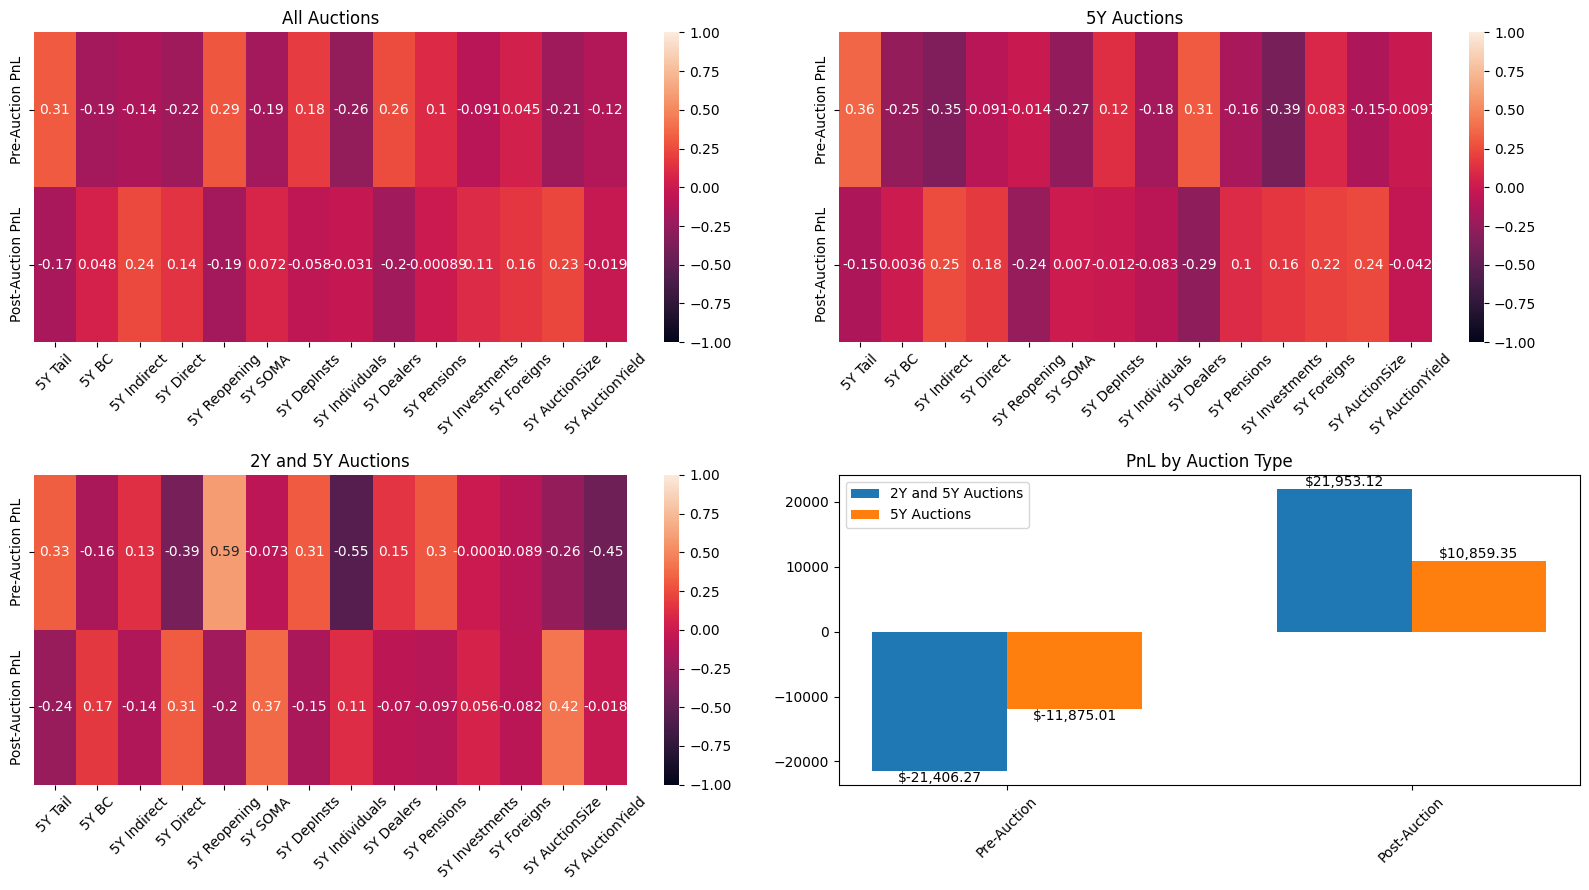

In [80]:
from auction_trading.pnl_calcs import calc_all_trades, plot_single_trade
import seaborn as sns

trades = calc_all_trades(tufv_spread, list(fives.index)[:50], 15, multiplier=10_000)
trades = pd.merge(trades, fives, left_index=True, right_index=True)

fig, axs = plt.subplots(2, 2, figsize=(16, 9))
corrs_all = trades.corr(numeric_only=True)
sns.heatmap(corrs_all.iloc[:2, 3:], annot=True, ax=axs[0, 0], vmin=-1, vmax=1)

# Filter trades to be 5Y or 2Y and 5Y
trades_5y = trades[trades['bond_series'].isin([['5Y']])]
trades_2y5y = trades[trades['bond_series'].isin([['2Y', '5Y']])]

# Plot correlations for 5Y trades
corrs_5y = trades_5y.corr(numeric_only=True)
sns.heatmap(corrs_5y.iloc[:2, 3:], annot=True, ax=axs[0, 1], vmin=-1, vmax=1)


# Plot correlations for 2Y and 5Y trades
corrs_2y5y = trades_2y5y.corr(numeric_only=True)
sns.heatmap(corrs_2y5y.iloc[:2, 3:], annot=True, ax=axs[1, 0], vmin=-1, vmax=1)

# Make rotations of ticks 45 degrees
for ax in axs.flat:
    ax.tick_params(axis='x', rotation=45)

# Set titles
axs[0, 0].set_title('All Auctions')
axs[0, 1].set_title('5Y Auctions')
axs[1, 0].set_title('2Y and 5Y Auctions')

# Get PnL by auction type
pnl_5yr_pre, pnl_5yr_post = trades_5y['Pre-Auction PnL'].sum(), trades_5y['Post-Auction PnL'].sum()
pnl_2y5y_pre, pnl_2y5y_post = trades_2y5y['Pre-Auction PnL'].sum(), trades_2y5y['Post-Auction PnL'].sum()

# Plot bar chart. Make the bars side by side.
width = 0.1
br1 = [0, 0.3]
br2 = [x + width for x in br1]

axs[1, 1].bar(br1, [pnl_2y5y_pre, pnl_5yr_pre], width=width, label='2Y and 5Y Auctions')
axs[1, 1].bar(br2, [pnl_2y5y_post, pnl_5yr_post], width=width, label='5Y Auctions')
axs[1, 1].set_xticks([x + width/2 for x in br1])
axs[1, 1].set_xticklabels(['Pre-Auction', 'Post-Auction'])

rects = axs[1, 1].patches
labels = [f'${i:,.2f}' for i in [pnl_2y5y_pre, pnl_5yr_pre, pnl_2y5y_post, pnl_5yr_post]]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    if height > 0:
        axs[1, 1].text(rect.get_x() + rect.get_width() / 2, height + 7, label,
            ha='center', va='bottom')
    else:
        axs[1, 1].text(rect.get_x() + rect.get_width() / 2, height - 7, label,
            ha='center', va='top')

axs[1, 1].set_title('PnL by Auction Type')
axs[1, 1].legend()


fig.tight_layout()

plt.show()

In [42]:
display(trades)

,Enter at Pre-Auction Time,Exit at Pre-Auction Time,Pre-Auction PnL,Enter at Post-Auction Time,Exit at Post-Auction Time,Post-Auction PnL,bond_series,num_auctions,5Y Tail,5Y BC,...,5Y Reopening,5Y SOMA,5Y DepInsts,5Y Individuals,5Y Dealers,5Y Pensions,5Y Investments,5Y Foreigns,5Y AuctionSize,5Y AuctionYield
2018-03-27,2018-03-22 07:00:00,2018-03-27 11:00:00,-2500.00,2018-03-27 13:00:00,2018-03-29 15:00:00,1796.87,[5Y],1.0,0.3,2.50,...,1.0,14.97734,0.00000,0.16327,31.36983,0.07143,53.73740,14.45522,35.0,2.612
2018-04-25,2018-04-20 07:00:00,2018-04-25 11:00:00,3593.76,2018-04-25 13:00:00,2018-04-27 15:00:00,1562.50,[5Y],1.0,0.0,2.49,...,1.0,11.31904,0.00000,0.17542,29.82195,0.07143,55.91280,9.54693,35.0,2.837
2018-05-23,2018-05-18 07:00:00,2018-05-23 11:00:00,-3203.13,2018-05-23 13:00:00,2018-05-25 15:00:00,4843.75,[5Y],1.0,0.2,2.52,...,1.0,14.80026,0.13889,0.16159,36.15987,0.13889,54.04516,7.89447,36.0,2.864
2018-06-27,2018-06-22 07:00:00,2018-06-27 11:00:00,-2812.50,2018-06-27 13:00:00,2018-06-29 15:00:00,-937.50,[5Y],1.0,0.4,2.55,...,1.0,11.07435,0.13889,0.10134,32.35578,0.00000,55.36409,12.01212,36.0,2.719
2018-07-25,2018-07-20 07:00:00,2018-07-25 11:00:00,3437.50,2018-07-25 13:00:00,2018-07-27 15:00:00,-859.38,[5Y],1.0,-0.9,2.61,...,1.0,5.15044,0.00000,0.09361,26.68961,0.00000,64.69931,7.87025,36.0,2.815
2018-08-28,2018-08-23 07:00:00,2018-08-28 11:00:00,2421.87,2018-08-28 13:00:00,2018-08-31 15:00:00,1328.12,[5Y],1.0,0.1,2.49,...,1.0,6.58400,0.18919,0.15142,26.49063,0.00000,63.49747,8.47130,37.0,2.765
2018-09-25,2018-09-20 07:00:00,2018-09-25 11:00:00,1093.75,2018-09-25 13:00:00,2018-09-28 15:00:00,1953.13,[5Y],1.0,0.6,2.39,...,1.0,0.00000,0.00000,0.10165,36.14265,0.07895,51.92698,11.41293,38.0,2.997
2018-10-24,2018-10-19 07:00:00,2018-10-24 11:00:00,-2968.75,2018-10-24 13:00:00,2018-10-26 15:00:00,2968.75,[5Y],1.0,0.6,2.30,...,1.0,0.00000,0.12821,0.10594,41.60174,0.00000,44.81916,12.87829,39.0,2.977
2018-11-27,2018-11-22 07:00:00,2018-11-27 11:00:00,-156.24,2018-11-27 13:00:00,2018-11-30 15:00:00,1718.75,[5Y],1.0,0.0,2.49,...,1.0,8.07259,0.00000,0.11934,32.61338,0.01000,54.49529,12.73699,40.0,2.880
2018-12-26,2018-12-21 07:00:00,2018-12-26 11:00:00,-4687.50,2018-12-26 13:00:00,2018-12-28 15:00:00,2734.37,[5Y],1.0,2.4,2.09,...,1.0,0.00000,0.00122,0.06847,39.45019,0.12196,40.80252,19.02881,41.0,2.652
